## **PROBLEMA 2**

**Modelo a Implementar**: Red Neuronal Artificial (RNA).

**Búsqueda de Hiperparámetros**: Utilizar GridSearchCV o RandomizedSearchCV.

**Validación Cruzada**: Aplicar 5 K-Fold cross-validation.

**Datos**: Se simulan observaciones en dos dimensiones, pertenecientes a tres grupos, cuya separación no es perfecta.

```python
from sklearn.datasets import make_blobs
X, y = make_blobs(
    n_samples    = 500, 
    n_features   = 2, 
    centers      = 3, 
    cluster_std  = 1.2, 
    shuffle      = True, 
    random_state = 0
)
```

**Objetivo**: Clasificar a qué grupo pertenece cada muestra.

**Debes responder a**: 
¿Cuál es la configuración de la Red Neuronal Artificial (RNA) que generó la mejor precisión (accuracy)? Se debe considerar la métrica de precisión para la toma de decisiones, así como la complejidad del modelo y el gasto computacional.

---




## **TL;DR**

### **RESPUESTA:**

La configuración de la Red Neuronal Artificial  que generó la mejor `precisión (accuracy)` tiene la siguiente estructura: dos capas ocultas, cada una con 6 neuronas `(hidden_layer_sizes: (6, 6))`. Esta configuración alcanzó una **precisión del 87.8%**.

Al considerar los gráficos generados, la mejor configuración se marca con un **punto rojo**. A pesar de ser una red relativamente simple, esta configuración logra un alto nivel de precisión, lo que sugiere que para este conjunto de datos y el problema de clasificación específico, una red más compleja no mejora necesariamente el rendimiento.

Adicionalmente, podemos observar que la complejidad de la red tiene un impacto significativo en la **complejidad computacional**, y nuestra red de baja complejidad denotada cn un punto rojo logró un excelente resultado en tiempo de entrenamiento. Dando excelente balance entre tiempo de entrenamiento, complejidad y rendimiento.

![Accuracy vs Model Complexity](imgs/acc_complexity.png)
![Training Time vs Model Complexity](imgs/time_complexity.png)

In [2]:
# imports

from sklearn.datasets import make_blobs
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from scipy.stats import randint
from tqdm import tqdm
import pandas as pd
import time
import matplotlib.pyplot as plt


Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END ...........................hidden_layer_sizes=(40,); total time=   0.3s
[CV] END ...........................hidden_layer_sizes=(40,); total time=   0.3s
[CV] END ...........................hidden_layer_sizes=(40,); total time=   0.4s
[CV] END ...........................hidden_layer_sizes=(40,); total time=   0.4s
[CV] END ...........................hidden_layer_sizes=(40,); total time=   0.4s
[CV] END ........................hidden_layer_sizes=(62, 62); total time=   0.4s
[CV] END ....................hidden_layer_sizes=(24, 24, 24); total time=   0.6s
[CV] END ....................hidden_layer_sizes=(24, 24, 24); total time=   0.8s
[CV] END ....................hidden_layer_sizes=(24, 24, 24); total time=   0.8s
[CV] END ....................hidden_layer_sizes=(12, 12, 12); total time=   0.5s
[CV] END ....................hidden_layer_sizes=(12, 12, 12); total time=   0.5s
[CV] END ....................hidden_layer_size

/home/felipera/anaconda3/envs/fixing-geetiles/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END ........................hidden_layer_sizes=(20, 20); total time=   0.4s
[CV] END ................hidden_layer_sizes=(68, 68, 68, 68); total time=   1.3s
[CV] END ...........................hidden_layer_sizes=(61,); total time=   0.3s
[CV] END ................hidden_layer_sizes=(68, 68, 68, 68); total time=   1.5s
[CV] END ...........................hidden_layer_sizes=(61,); total time=   0.3s
[CV] END ...........................hidden_layer_sizes=(91,); total time=   0.3s
[CV] END ............hidden_layer_sizes=(80, 80, 80, 80, 80); total time=   0.6s
[CV] END ................hidden_layer_sizes=(37, 37, 37, 37); total time=   0.6s
[CV] END ...........................hidden_layer_sizes=(91,); total time=   0.3s
[CV] END ............hidden_layer_sizes=(31, 31, 31, 31, 31); total time=   0.8s
[CV] END ................hidden_layer_sizes=(37, 37, 37, 37); total time=   0.8s
[CV] END ...........................hidden_layer_sizes=(91,); total time=   0.3s
[CV] END ................hid

/home/felipera/anaconda3/envs/fixing-geetiles/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END ....................hidden_layer_sizes=(42, 42, 42); total time=   0.8s
[CV] END ............hidden_layer_sizes=(12, 12, 12, 12, 12); total time=   0.5s
[CV] END ....................hidden_layer_sizes=(42, 42, 42); total time=   0.9s
[CV] END ............hidden_layer_sizes=(21, 21, 21, 21, 21); total time=   0.7s
[CV] END ............hidden_layer_sizes=(21, 21, 21, 21, 21); total time=   0.8s
[CV] END ....................hidden_layer_sizes=(42, 42, 42); total time=   0.9s
[CV] END ............hidden_layer_sizes=(21, 21, 21, 21, 21); total time=   0.7s
[CV] END ............hidden_layer_sizes=(32, 32, 32, 32, 32); total time=   1.4s
[CV] END ....................hidden_layer_sizes=(42, 42, 42); total time=   1.0s
[CV] END ............hidden_layer_sizes=(12, 12, 12, 12, 12); total time=   0.7s
[CV] END ....................hidden_layer_sizes=(42, 42, 42); total time=   1.1s
[CV] END ............hidden_layer_sizes=(12, 12, 12, 12, 12); total time=   0.5s
[CV] END ............hidden_

/home/felipera/anaconda3/envs/fixing-geetiles/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END ...........................hidden_layer_sizes=(59,); total time=   0.3s
[CV] END ............hidden_layer_sizes=(16, 16, 16, 16, 16); total time=   0.8s
[CV] END ...........................hidden_layer_sizes=(59,); total time=   0.2s
[CV] END ............hidden_layer_sizes=(16, 16, 16, 16, 16); total time=   1.0s
[CV] END ............hidden_layer_sizes=(16, 16, 16, 16, 16); total time=   0.8s
[CV] END ........................hidden_layer_sizes=(47, 47); total time=   1.4s
[CV] END ...........................hidden_layer_sizes=(59,); total time=   0.3s
[CV] END ........................hidden_layer_sizes=(47, 47); total time=   1.4s
[CV] END ....................hidden_layer_sizes=(68, 68, 68); total time=   0.8s
[CV] END ...........................hidden_layer_sizes=(59,); total time=   0.3s
[CV] END ...........................hidden_layer_sizes=(59,); total time=   0.4s
[CV] END ............hidden_layer_sizes=(16, 16, 16, 16, 16); total time=   1.2s
[CV] END ...................

/home/felipera/anaconda3/envs/fixing-geetiles/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END ..........................hidden_layer_sizes=(3, 3); total time=   0.7s
[CV] END ....................hidden_layer_sizes=(64, 64, 64); total time=   1.7s
[CV] END ....................hidden_layer_sizes=(64, 64, 64); total time=   1.5s
[CV] END ................hidden_layer_sizes=(36, 36, 36, 36); total time=   0.6s
[CV] END ................hidden_layer_sizes=(36, 36, 36, 36); total time=   0.7s
[CV] END ................hidden_layer_sizes=(36, 36, 36, 36); total time=   0.7s
[CV] END ................hidden_layer_sizes=(77, 77, 77, 77); total time=   0.6s
[CV] END ................hidden_layer_sizes=(36, 36, 36, 36); total time=   0.9s
[CV] END ................hidden_layer_sizes=(36, 36, 36, 36); total time=   1.1s
[CV] END ................hidden_layer_sizes=(42, 42, 42, 42); total time=   1.0s
[CV] END ................hidden_layer_sizes=(42, 42, 42, 42); total time=   1.0s
[CV] END ........................hidden_layer_sizes=(26, 26); total time=   0.4s
[CV] END ................hid

/home/felipera/anaconda3/envs/fixing-geetiles/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/felipera/anaconda3/envs/fixing-geetiles/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END ................hidden_layer_sizes=(39, 39, 39, 39); total time=   1.2s
[CV] END ............hidden_layer_sizes=(87, 87, 87, 87, 87); total time=   0.7s
[CV] END ...........................hidden_layer_sizes=(87,); total time=   0.5s
[CV] END ................hidden_layer_sizes=(39, 39, 39, 39); total time=   1.4s
[CV] END ........................hidden_layer_sizes=(42, 42); total time=   1.4s
[CV] END ............hidden_layer_sizes=(87, 87, 87, 87, 87); total time=   0.9s


/home/felipera/anaconda3/envs/fixing-geetiles/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END ............hidden_layer_sizes=(87, 87, 87, 87, 87); total time=   1.3s
[CV] END ........................hidden_layer_sizes=(41, 41); total time=   0.9s
[CV] END ............hidden_layer_sizes=(87, 87, 87, 87, 87); total time=   1.8s
[CV] END ....................hidden_layer_sizes=(65, 65, 65); total time=   1.3s
[CV] END ........................hidden_layer_sizes=(95, 95); total time=   1.4s
[CV] END ........................hidden_layer_sizes=(41, 41); total time=   1.1s
[CV] END ........................hidden_layer_sizes=(41, 41); total time=   1.1s
[CV] END ....................hidden_layer_sizes=(65, 65, 65); total time=   1.3s
[CV] END ........................hidden_layer_sizes=(95, 95); total time=   1.6s
[CV] END ....................hidden_layer_sizes=(65, 65, 65); total time=   1.4s
[CV] END ....................hidden_layer_sizes=(65, 65, 65); total time=   1.6s
[CV] END ........................hidden_layer_sizes=(95, 95); total time=   1.8s
[CV] END ...................

/home/felipera/anaconda3/envs/fixing-geetiles/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END ........................hidden_layer_sizes=(95, 95); total time=   2.1s
[CV] END ................hidden_layer_sizes=(84, 84, 84, 84); total time=   0.8s
[CV] END ........................hidden_layer_sizes=(95, 95); total time=   2.1s
[CV] END ........................hidden_layer_sizes=(41, 41); total time=   1.3s


/home/felipera/anaconda3/envs/fixing-geetiles/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END ........................hidden_layer_sizes=(72, 72); total time=   0.7s
[CV] END ........................hidden_layer_sizes=(72, 72); total time=   0.7s
[CV] END ................hidden_layer_sizes=(84, 84, 84, 84); total time=   1.3s
[CV] END ................hidden_layer_sizes=(84, 84, 84, 84); total time=   1.3s
[CV] END ................hidden_layer_sizes=(84, 84, 84, 84); total time=   1.4s
[CV] END ........................hidden_layer_sizes=(72, 72); total time=   1.0s
[CV] END ........................hidden_layer_sizes=(72, 72); total time=   1.2s
[CV] END ................hidden_layer_sizes=(84, 84, 84, 84); total time=   1.3s
[CV] END ........................hidden_layer_sizes=(61, 61); total time=   0.9s
[CV] END ........................hidden_layer_sizes=(72, 72); total time=   1.4s
[CV] END ................hidden_layer_sizes=(56, 56, 56, 56); total time=   0.8s
[CV] END ................hidden_layer_sizes=(67, 67, 67, 67); total time=   0.3s
[CV] END ...................

/home/felipera/anaconda3/envs/fixing-geetiles/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END ........................hidden_layer_sizes=(43, 43); total time=   1.3s
[CV] END ........................hidden_layer_sizes=(65, 65); total time=   1.8s
[CV] END ....................hidden_layer_sizes=(35, 35, 35); total time=   1.0s
[CV] END .......................hidden_layer_sizes=(2, 2, 2); total time=   0.2s
[CV] END ................hidden_layer_sizes=(18, 18, 18, 18); total time=   1.1s
[CV] END ....................hidden_layer_sizes=(35, 35, 35); total time=   1.2s
[CV] END ....................hidden_layer_sizes=(80, 80, 80); total time=   0.7s
[CV] END ....................hidden_layer_sizes=(35, 35, 35); total time=   1.5s
[CV] END ................hidden_layer_sizes=(18, 18, 18, 18); total time=   1.2s
[CV] END ................hidden_layer_sizes=(18, 18, 18, 18); total time=   1.3s
[CV] END .......................hidden_layer_sizes=(2, 2, 2); total time=   0.5s
[CV] END ....................hidden_layer_sizes=(35, 35, 35); total time=   1.7s
[CV] END ...................

/home/felipera/anaconda3/envs/fixing-geetiles/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END ............hidden_layer_sizes=(54, 54, 54, 54, 54); total time=   0.4s
[CV] END ....................hidden_layer_sizes=(80, 80, 80); total time=   1.1s


/home/felipera/anaconda3/envs/fixing-geetiles/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END .......................hidden_layer_sizes=(2, 2, 2); total time=   0.9s
[CV] END ............hidden_layer_sizes=(54, 54, 54, 54, 54); total time=   0.7s
[CV] END ........................hidden_layer_sizes=(71, 71); total time=   0.7s
[CV] END ............hidden_layer_sizes=(54, 54, 54, 54, 54); total time=   0.9s
[CV] END ........................hidden_layer_sizes=(71, 71); total time=   0.6s
[CV] END ............hidden_layer_sizes=(54, 54, 54, 54, 54); total time=   1.1s
[CV] END ....................hidden_layer_sizes=(80, 80, 80); total time=   1.7s
[CV] END ............hidden_layer_sizes=(95, 95, 95, 95, 95); total time=   1.1s
[CV] END ........................hidden_layer_sizes=(35, 35); total time=   0.4s
[CV] END ........................hidden_layer_sizes=(71, 71); total time=   1.5s
[CV] END ............hidden_layer_sizes=(54, 54, 54, 54, 54); total time=   1.7s
[CV] END ........................hidden_layer_sizes=(71, 71); total time=   1.5s
[CV] END ............hidden_

/home/felipera/anaconda3/envs/fixing-geetiles/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END ...........................hidden_layer_sizes=(27,); total time=   0.4s
[CV] END ....................hidden_layer_sizes=(52, 52, 52); total time=   1.1s
[CV] END ...........................hidden_layer_sizes=(27,); total time=   0.4s
[CV] END ....................hidden_layer_sizes=(52, 52, 52); total time=   1.1s
[CV] END ....................hidden_layer_sizes=(52, 52, 52); total time=   1.1s
[CV] END ....................hidden_layer_sizes=(52, 52, 52); total time=   1.2s
[CV] END ....................hidden_layer_sizes=(52, 52, 52); total time=   1.2s
[CV] END ........................hidden_layer_sizes=(63, 63); total time=   1.7s
[CV] END ........................hidden_layer_sizes=(63, 63); total time=   1.4s


/home/felipera/anaconda3/envs/fixing-geetiles/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END ...........................hidden_layer_sizes=(69,); total time=   0.3s
[CV] END ...........................hidden_layer_sizes=(69,); total time=   0.3s
[CV] END ........................hidden_layer_sizes=(63, 63); total time=   2.0s
[CV] END ...........................hidden_layer_sizes=(69,); total time=   0.3s
[CV] END ...........................hidden_layer_sizes=(69,); total time=   0.4s
[CV] END ...........................hidden_layer_sizes=(69,); total time=   0.4s
[CV] END ............hidden_layer_sizes=(50, 50, 50, 50, 50); total time=   0.8s
[CV] END ............hidden_layer_sizes=(50, 50, 50, 50, 50); total time=   1.0s
[CV] END ................hidden_layer_sizes=(23, 23, 23, 23); total time=   1.0s
[CV] END ............hidden_layer_sizes=(50, 50, 50, 50, 50); total time=   1.2s
[CV] END ............hidden_layer_sizes=(50, 50, 50, 50, 50); total time=   1.1s
[CV] END ............hidden_layer_sizes=(50, 50, 50, 50, 50); total time=   1.3s
[CV] END ................hid

/home/felipera/anaconda3/envs/fixing-geetiles/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END ........................hidden_layer_sizes=(99, 99); total time=   1.5s
[CV] END ........................hidden_layer_sizes=(99, 99); total time=   1.5s
[CV] END .......................hidden_layer_sizes=(5, 5, 5); total time=   1.1s
[CV] END ........................hidden_layer_sizes=(20, 20); total time=   0.3s
[CV] END .......................hidden_layer_sizes=(5, 5, 5); total time=   0.8s
[CV] END ...........................hidden_layer_sizes=(88,); total time=   0.3s
[CV] END ...........................hidden_layer_sizes=(88,); total time=   0.3s
[CV] END ...........................hidden_layer_sizes=(88,); total time=   0.3s
[CV] END ...........................hidden_layer_sizes=(88,); total time=   0.3s


/home/felipera/anaconda3/envs/fixing-geetiles/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END ...........................hidden_layer_sizes=(88,); total time=   0.4s
[CV] END ........................hidden_layer_sizes=(20, 20); total time=   0.4s
[CV] END ........................hidden_layer_sizes=(99, 99); total time=   1.8s
[CV] END ........................hidden_layer_sizes=(43, 43); total time=   0.4s
[CV] END ........................hidden_layer_sizes=(43, 43); total time=   0.5s
[CV] END ................hidden_layer_sizes=(21, 21, 21, 21); total time=   0.7s
[CV] END ............hidden_layer_sizes=(70, 70, 70, 70, 70); total time=   0.6s
[CV] END ................hidden_layer_sizes=(21, 21, 21, 21); total time=   1.0s
[CV] END ........................hidden_layer_sizes=(43, 43); total time=   1.0s
[CV] END ............hidden_layer_sizes=(70, 70, 70, 70, 70); total time=   0.9s
[CV] END ................hidden_layer_sizes=(21, 21, 21, 21); total time=   1.3s
[CV] END ........................hidden_layer_sizes=(43, 43); total time=   1.2s
[CV] END ................hid

/home/felipera/anaconda3/envs/fixing-geetiles/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END ............hidden_layer_sizes=(70, 70, 70, 70, 70); total time=   1.4s
[CV] END ............hidden_layer_sizes=(70, 70, 70, 70, 70); total time=   1.5s
[CV] END ............hidden_layer_sizes=(70, 70, 70, 70, 70); total time=   1.4s
Best parameters found: {'hidden_layer_sizes': (6, 6)}
Best accuracy found: 0.8800000000000001
Total search time: 29.481768131256104


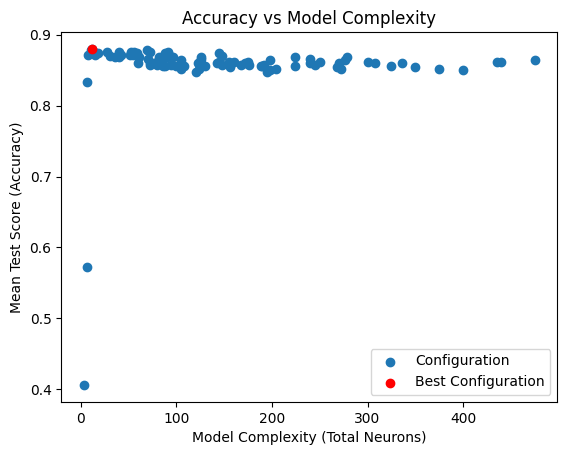

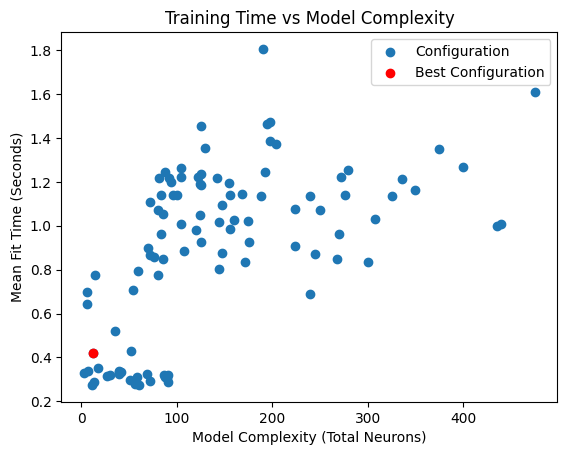

In [3]:


# Generate synthetic data
X, y = make_blobs(
    n_samples=500,
    n_features=2,
    centers=3,
    cluster_std=1.2,
    shuffle=True,
    random_state=0
)

n_iter = 100

# Define the parameter distribution for RandomizedSearchCV
param_dist = {
    'hidden_layer_sizes': [(randint(1, 101).rvs(),) * randint(1, 6).rvs() for _ in range(n_iter)]
}

# Stratified K-Folds cross-validator
cv = StratifiedKFold(n_splits=5)

# Create a classifier: a multi-layer perceptron classifier
mlp = MLPClassifier(max_iter=1000)

# Create RandomizedSearchCV
clf = RandomizedSearchCV(mlp, param_dist, n_iter=n_iter, cv=cv, verbose=2, n_jobs=-1, random_state=42, scoring='accuracy')

# Start timing the search
start_time = time.time()

# Fit the classifier
search = clf.fit(X, y)

# End timing the search
end_time = time.time()
search_time = end_time - start_time

# The best model's parameters and score
best_parameters = search.best_params_
best_score = search.best_score_

# Collecting all the results in a DataFrame
results = pd.DataFrame(search.cv_results_)

# Adding a new column for model complexity (total number of neurons across all layers)
results['model_complexity'] = results['param_hidden_layer_sizes'].apply(lambda x: sum(x))

# Adding a new column for training time
results['search_time'] = search_time

# Output the best parameters and the accuracy
print("Best parameters found:", best_parameters)
print("Best accuracy found:", best_score)
print("Total search time:", search_time)

# plotting accuracy vs. model complexity:
plt.scatter(results['model_complexity'], results['mean_test_score'], label='Configuration')
# Mark the best configuration with a red dot
plt.scatter([sum(best_parameters['hidden_layer_sizes'])], [best_score], color='red', label='Best Configuration', zorder=5)
plt.xlabel('Model Complexity (Total Neurons)')
plt.ylabel('Mean Test Score (Accuracy)')
plt.title('Accuracy vs Model Complexity')
plt.legend()
plt.show()

# To compare search time:
plt.scatter(results['model_complexity'], results['mean_fit_time'], label='Configuration')
# Mark the best configuration with a red dot
plt.scatter([sum(best_parameters['hidden_layer_sizes'])], [results.loc[results['rank_test_score'] == 1, 'mean_fit_time'].iloc[0]], color='red', label='Best Configuration', zorder=5)
plt.xlabel('Model Complexity (Total Neurons)')
plt.ylabel('Mean Fit Time (Seconds)')
plt.title('Training Time vs Model Complexity')
plt.legend()
plt.show()


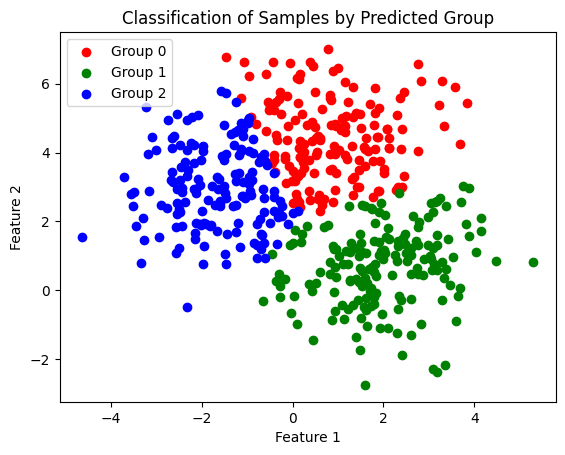

In [4]:
# Now we use the best model to predict all samples
y_pred = search.best_estimator_.predict(X)

# Plotting each sample, colored by its predicted group
colors = ['red', 'green', 'blue']
for i, color in enumerate(colors):
    plt.scatter(X[y_pred == i, 0], X[y_pred == i, 1], c=color, label=f'Group {i}')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Classification of Samples by Predicted Group')
plt.legend()
plt.show()